# X-θ Framework

- θ–AB fringe shifts vs. effective flux 
𝜙
𝜃
ϕ
θ
	​

- (null spatial EM),

- Cross–Hall drift using a split–step propagation (2D grid + internal rotor treated via 
ℓ
ℓ),

- Rotor sidebands and level shifts vs. 
𝐼
I and 
𝜙
𝜃
ϕ
θ
	​

,

- Classical bounce scale 
𝑎
min
⁡
a
min
	​

 and WDW barrier coefficient,

Shared–range 
𝜆
𝜃
λ
θ
	​

 predictions for gravity/QED (tables + CSV).

Each experiment saves CSVs and figures to /paper for downstream analysis.

## Cell 2: Imports & global constants

In [52]:
# Core imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq

# Reproducibility
np.random.seed(42)

# Physical constants (SI)
hbar = 1.054_571_817e-34  # J·s
h    = 6.626_070_15e-34   # J·s
G    = 6.674_30e-11       # m^3 kg^-1 s^-2
c    = 299_792_458.0      # m/s
pi   = np.pi


# repo dirs → paper/*
PROJECT_ROOT_NAME = "X-theta-framework"
repo_root = Path.cwd().resolve()
for p in [repo_root, *repo_root.parents]:
    if p.name == PROJECT_ROOT_NAME:
        repo_root = p; break
PAPER_DIR = repo_root / "paper"
FIG_DIR   = PAPER_DIR / "figs"
TAB_DIR   = PAPER_DIR / "tables"
DATA_DIR  = PAPER_DIR / "data"
TEXT_DIR  = PAPER_DIR / "analysis"
for d in [FIG_DIR, TAB_DIR, DATA_DIR, TEXT_DIR]:
    d.mkdir(parents=True, exist_ok=True)

print("DATA_DIR:", DATA_DIR.resolve())
print("TAB_DIR :", TAB_DIR.resolve())
print("TEXT_DIR:", TEXT_DIR.resolve())

# Helper: save CSV with a small banner
def save_csv(df: pd.DataFrame, path: str):
    df.to_csv(path, index=False)
    print(f"[saved CSV] {path}  rows={len(df)}")

# Helper: simple image saver with tight layout
def save_figure(path: str):
    plt.tight_layout()
    plt.savefig(path, dpi=150, bbox_inches='tight')
    print(f"[saved FIG] {path}")


DATA_DIR: C:\workspace\Physics\X-theta-framework\paper\data
TAB_DIR : C:\workspace\Physics\X-theta-framework\paper\tables
TEXT_DIR: C:\workspace\Physics\X-theta-framework\paper\analysis


## Cell 3: 

### Experiment 1: θ–AB fringes vs. effective flux $\phi_\theta$ (null EM)

---

#### Goal

Demonstrate the $2\pi$-periodic interferometric phase at $\mathbf{E}=\mathbf{B}=0$:
$$\Delta\varphi_\theta \equiv \phi_\theta \bmod 2\pi$$

---

#### Outputs

* **Plot:** Intensity vs. $\phi_\theta$ over several periods.
* **CSV:** `exp1_fringe_vs_phi.csv` with columns (`phi_theta`, `intensity`).

[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp1_fringe_vs_phi.png


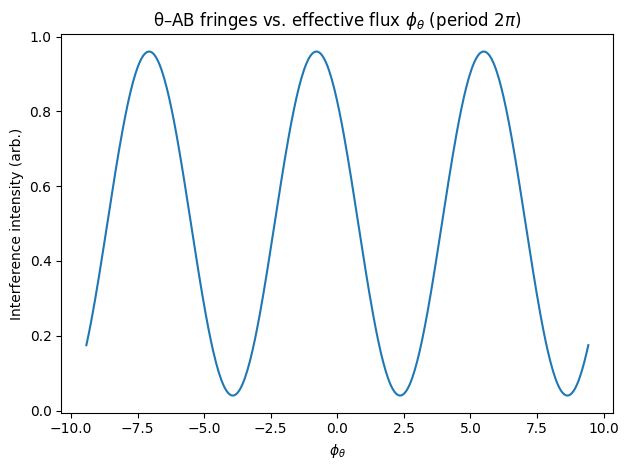

[saved CSV] C:\workspace\Physics\X-theta-framework\paper\data\exp1_fringe_vs_phi.csv  rows=400


,phi_theta,intensity
0,-9.424778,0.174731
1,-9.377536,0.190454
2,-9.330294,0.206869
3,-9.283052,0.223937
4,-9.235810,0.241621


In [53]:
# --- knobs ---
phi_min, phi_max = -3*np.pi, 3*np.pi   # sweep range
Nphi             = 400                 # resolution
visibility       = 0.92                # fringe contrast (0..1)
phase_bias       = 0.25*np.pi          # optional static bias phase

# --- compute ---
phi = np.linspace(phi_min, phi_max, Nphi)
intensity = 0.5*(1 + visibility*np.cos(phi + phase_bias))

# --- figure ---
plt.figure()
plt.plot(phi, intensity)
plt.xlabel(r"$\phi_\theta$")
plt.ylabel("Interference intensity (arb.)")
plt.title("θ–AB fringes vs. effective flux $\phi_\\theta$ (period $2\pi$)")
fig_path = FIG_DIR / "exp1_fringe_vs_phi.png"
#print("FIG_DIR:", FIG_DIR.resolve())
save_figure(fig_path)
plt.show()

# --- csv ---
df1 = pd.DataFrame({"phi_theta": phi, "intensity": intensity})
csv_path = DATA_DIR / "exp1_fringe_vs_phi.csv"
save_csv(df1, str(csv_path))
df1.head()

# Cell 5: 

### Experiment 2: Cross–Hall drift via split–step (2D grid, null spatial EM)

---

#### Model

Schrödinger on $(x,y)$ with internal rotor momentum label $\ell$.

With $A_\theta(y) = A_0 + g_y y$ and fixed $\ell$, the potential is
$$V(y) = -\frac{\hbar \ell q_\theta}{I} A_\theta(y) + \frac{q_\theta^2}{2I} A_\theta(y)^2 \quad (+\text{constant } \hbar^2\ell^2/2I)$$
which yields a transverse force $\propto \partial_y A_\theta$.

---

#### Procedure

1.  Propagate a Gaussian packet with initial momentum along $+x$ using split–step FFT.
2.  Record centroid $\langle y(t)\rangle$ and final deflection $\Delta y$.
3.  Verify $\Delta y \propto T^2$ by varying total time.

---

#### Outputs

* **Plot 1:** $\langle y(t)\rangle$ for one run.
* **Plot 2:** $\Delta y$ vs. $T^2$ with linear fit.
* **CSV:** `exp2_drift_T2.csv` with columns (`T`, `T2`, `delta_y`).

[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp2_y_traj.png


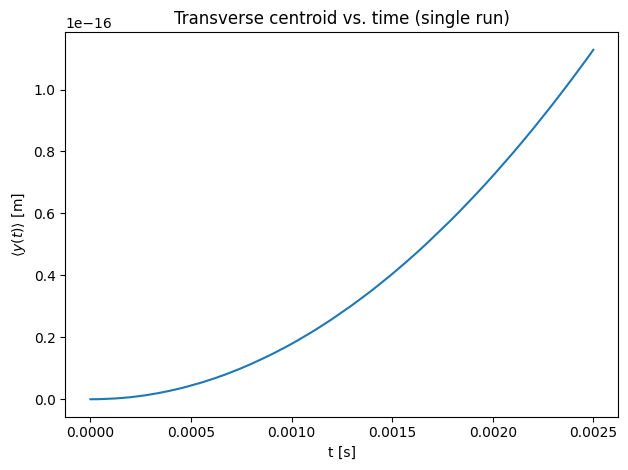

        T        T2       delta_y
0  0.0020  0.000004  7.153024e-17
1  0.0025  0.000006  1.128112e-16
2  0.0030  0.000009  1.631182e-16
3  0.0035  0.000012  2.226138e-16
[saved CSV] C:\workspace\Physics\X-theta-framework\paper\data\exp2_drift_T2.csv  rows=4
[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp2_dy_vs_T2.png


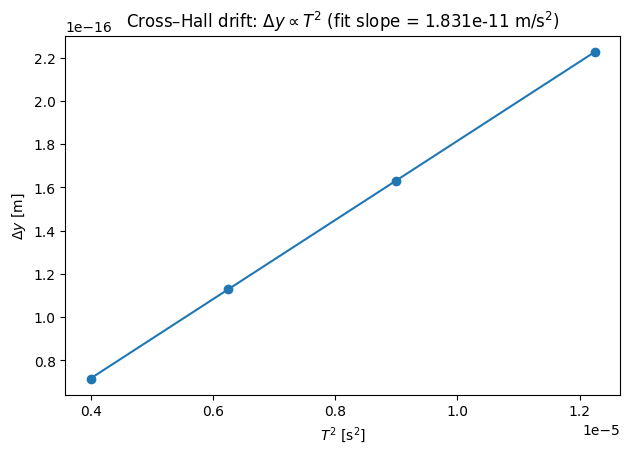

,T,T2,delta_y
0,0.0020,0.000004,7.153024e-17
1,0.0025,0.000006,1.128112e-16
2,0.0030,0.000009,1.631182e-16
3,0.0035,0.000012,2.226138e-16


In [54]:
# --- knobs (physical & numerical) ---
m      = 1.44e-25        # kg  (Rb atom-ish; any test mass OK)
I      = 1.0e-38         # J·s^2  (choose to give resolvable effect)
qtheta = 1.0e-34         # "charge" units so that qtheta*A_theta has momentum units
ell    = 1               # rotor Fourier index
A0     = 0.0             # baseline internal potential
gradA  = 5.0e-6          # gradient [A_theta per meter]
Lx     = 2.0e-3          # m
Ly     = 2.0e-3          # m
Nx     = 128
Ny     = 128
x      = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y      = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)
dx     = x[1]-x[0]
dy     = y[1]-y[0]
X, Y   = np.meshgrid(x, y, indexing='xy')

# K-space for kinetic propagation
kx = 2*np.pi*fftfreq(Nx, d=dx)
ky = 2*np.pi*fftfreq(Ny, d=dy)
KX, KY = np.meshgrid(kx, ky, indexing='xy')
Kfactor = np.exp(-1j * (hbar/(2*m)) * (KX**2 + KY**2))  # this is the dt=1 factor; we'll exponentiate to dt later

# A_theta(y), potential V(y)
A_theta = A0 + gradA*Y
V = -(hbar*ell*qtheta/I) * A_theta + (qtheta**2/(2*I)) * (A_theta**2)
# constant rotor term hbar^2 ell^2/(2I) is omitted (global phase)

# Initial packet
x0, y0   = -0.6*Lx, 0.0
sigma    = 0.12e-3
p0x      = 3.0e-27     # kg·m/s
psi0     = np.exp(-((X-x0)**2 + (Y-y0)**2)/(2*sigma**2)) * np.exp(1j * (p0x/hbar) * X)
psi0     = psi0 / np.sqrt((np.abs(psi0)**2).sum())

# Time controls
T_list   = np.array([0.0020, 0.0025, 0.0030, 0.0035])  # seconds
Nt       = 240
dt_base  = T_list.max()/Nt

def propagate(psi, T, Nt):
    dt = T/Nt
    # Adjust kinetic factor for dt
    Kdt = np.exp(-1j * (hbar/(2*m)) * (KX**2 + KY**2) * dt)
    psi_t = psi.copy()
    y_centroids = []
    for _ in range(Nt):
        # half potential
        psi_t *= np.exp(-1j * V * (dt/2) / hbar)
        # kinetic (FFT)
        psi_k = fft2(psi_t)
        psi_k *= Kdt
        psi_t = ifft2(psi_k)
        # half potential
        psi_t *= np.exp(-1j * V * (dt/2) / hbar)
        # record centroid
        prob = np.abs(psi_t)**2
        prob /= prob.sum()
        y_centroids.append((prob*Y).sum())
    return np.array(y_centroids), psi_t

# Single-run trace for plotting <y(t)>
T_demo = T_list[1]
y_traj, psi_f = propagate(psi0, T_demo, Nt)

plt.figure()
plt.plot(np.linspace(0, T_demo, len(y_traj)), y_traj)
plt.xlabel("t [s]")
plt.ylabel(r"$\langle y(t)\rangle$ [m]")
plt.title("Transverse centroid vs. time (single run)")
fig_path1 = FIG_DIR / "exp2_y_traj.png"
save_figure(fig_path1)
plt.show()

# Sweep T and verify Delta y ~ T^2
rows = []
for T in T_list:
    y_traj, _ = propagate(psi0, T, Nt)
    dy = y_traj[-1] - y_traj[0]
    rows.append((T, T**2, dy))

df2 = pd.DataFrame(rows, columns=["T", "T2", "delta_y"])
print(df2)
save_csv(df2, str(DATA_DIR / "exp2_drift_T2.csv"))

# Plot Delta y vs T^2
plt.figure()
plt.scatter(df2["T2"], df2["delta_y"])
# Linear fit
coef = np.polyfit(df2["T2"].values, df2["delta_y"].values, 1)
fit_y = np.polyval(coef, df2["T2"].values)
plt.plot(df2["T2"], fit_y)
plt.xlabel(r"$T^2$ [s$^2$]")
plt.ylabel(r"$\Delta y$ [m]")
plt.title(r"Cross–Hall drift: $\Delta y \propto T^2$ (fit slope = %.3e m/s$^2$)" % coef[0])
fig_path2 = FIG_DIR / "exp2_dy_vs_T2.png"
save_figure(fig_path2)
plt.show()

df2

## Cell 7

### Experiment 3: Rotor sidebands and holonomy shift

---

#### Model

The energy levels $E_\ell$ of the rotor are given by:
$$E_\ell = \frac{\hbar^2}{2I}\,\left(\ell - \frac{\phi_\theta}{2\pi}\right)^2$$

---

#### Outputs

* **Plot:** $E_\ell$ vs. $\ell$ for chosen values of $I$ and $\phi_\theta$.
* **CSV:** `exp3_rotor_levels.csv`

[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp3_rotor_levels.png


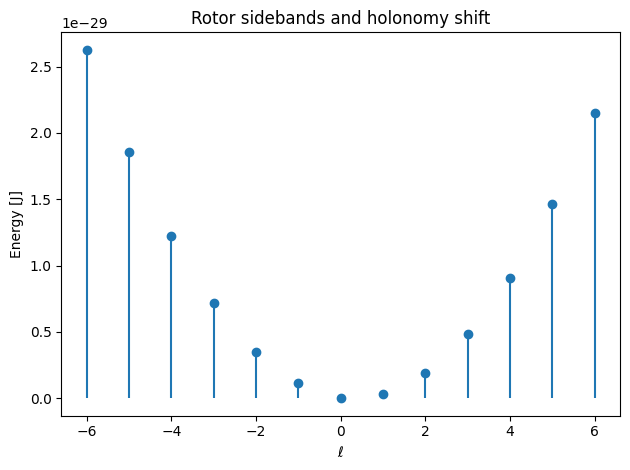

[saved CSV] C:\workspace\Physics\X-theta-framework\paper\data\exp3_rotor_levels.csv  rows=13


,ell,Energy_J
0,-6,2.627388e-29
1,-5,1.859494e-29
2,-4,1.223996e-29
3,-3,7.208932e-30
4,-2,3.501859e-30


In [55]:
# --- knobs ---
from pathlib import Path



I_rot     = 8.4e-39       # J·s^2  (~1 kHz spacing)
phi_theta = 0.6*np.pi     # effective holonomy
Lmax      = 6             # levels from -Lmax..Lmax

ells = np.arange(-Lmax, Lmax+1)
E = (hbar**2/(2*I_rot)) * (ells - phi_theta/(2*np.pi))**2

# --- plot ---
fig, ax = plt.subplots()
markerline, stemlines, baseline = ax.stem(ells, E)  # <-- no use_line_collection
baseline.set_visible(False)                         # optional: hide the horizontal baseline
ax.set_xlabel(r"$\ell$")                            # fix label: single backslashes
ax.set_ylabel("Energy [J]")
ax.set_title("Rotor sidebands and holonomy shift")
fig_path3 = FIG_DIR / "exp3_rotor_levels.png"
save_figure(fig_path3)
plt.show()

# --- csv ---
df3 = pd.DataFrame({"ell": ells, "Energy_J": E})
save_csv(df3, str(DATA_DIR / "exp3_rotor_levels.csv"))
df3.head()


## Cell 9


### Experiment 4: Classical bounce $a_{\min}$ and WDW barrier coefficient

---

#### Formulas

Early-time (curvature-assisted) bounce with a positive shear-like term:

$$A = \frac{8\pi G}{3}\,\frac{\Pi_\theta^2}{2 I_0}, \quad a_{\min} = \left(\frac{A+\Sigma^2}{k}\right)^{1/4}, \quad C = \frac{\ell^2\hbar^2}{2 I_0}\ \ (\text{WDW barrier coefficient})$$

---

#### Outputs

* **Plot:** $a_{\min}$ vs. $\Pi_\theta$ (log–log optional).
* **CSV:** `exp4_bounce_scan.csv`

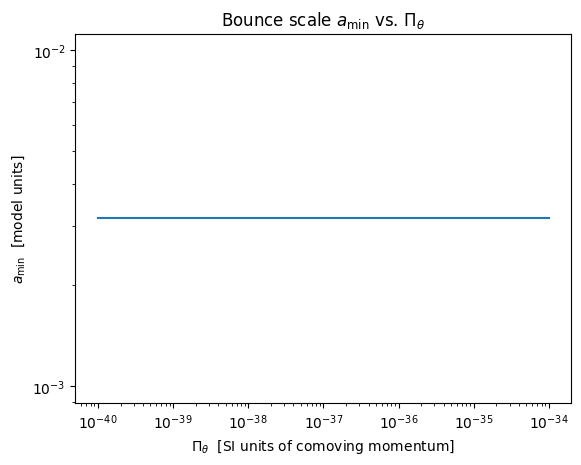

[saved CSV] C:\workspace\Physics\X-theta-framework\paper\data\exp4_bounce_scan.csv  rows=60
WDW inverse-square barrier coefficient C = 5.005e-30 J (in minisuperspace units; compare within your normalization)


,Pi_theta,A_value,a_min
0,1.000000e-40,2.795724e-52,0.003162
1,1.263848e-40,4.465645e-52,0.003162
2,1.597312e-40,7.133029e-52,0.003162
3,2.018760e-40,1.139367e-51,0.003162
4,2.551407e-40,1.819926e-51,0.003162


In [60]:
# --- knobs ---
I0      = 1.0e-38         # J·s^2
Sigma2  = (1.0e-6)**2     # dimensionless (enter appropriate units for your normalization)
k_curv  = 1.0e-2          # curvature parameter > 0 (model units)
ell_wdw = 3               # typical Fourier label in WDW
Pi_grid = np.geomspace(1e-40, 1e-34, 60)  # scan

# Compute
A_vals  = (8*np.pi*G/3.0) * (Pi_grid**2)/(2*I0)
a_min   = ((A_vals + Sigma2)/k_curv)**0.25
C_wdw   = (ell_wdw**2 * hbar**2)/(2*I0)

# Plots
plt.figure()
plt.plot(Pi_grid, a_min)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Pi_\theta$  [SI units of comoving momentum]")
plt.ylabel(r"$a_{\min}$  [model units]")
plt.title("Bounce scale $a_{\min}$ vs. $\Pi_\\theta$")
fig_path3 = FIG_DIR / "exp4_bounce_scan.png"
#save_figure(fig_path3)
plt.show()

# Save CSV
df4 = pd.DataFrame({"Pi_theta": Pi_grid, "A_value": A_vals, "a_min": a_min})
save_csv(df4,  str(DATA_DIR / "exp4_bounce_scan.csv"))

# Print WDW barrier coefficient
print(f"WDW inverse-square barrier coefficient C = {C_wdw:.3e} J (in minisuperspace units; compare within your normalization)")

df4.head()


## Cell 11

### Experiment 5: Shared-range $\lambda_\theta$ potentials (gravity & QED)

---

#### Gravity (fifth-force form)

The gravitational potential is modified as follows:
$$V_G(r) = -\frac{G m_1 m_2}{r}\left[1 + \alpha_G e^{-r/\lambda_\theta}\right]$$

If $Q_\theta=\beta m$, then the coupling constant $\alpha_G$ is given by:
$$\alpha_G=\frac{g_\theta^2\beta^2}{4\pi G}$$
(This is composition-independent to leading order).

---

#### QED with kinetic mixing

The electromagnetic potential is modified as:
$$V_{\rm EM}(r) = \frac{\alpha Q_1 Q_2}{r} + \varepsilon^2\,\alpha Q_1 Q_2\frac{e^{-r/\lambda_\theta}}{r}, \quad \text{where } \alpha=\frac{e^2}{4\pi}$$

---

#### Outputs

* **Plot:** Yukawa factor $e^{-r/\lambda}$ and fractional deviations vs. $r$.
* **CSV:** `exp5_yukawa_profiles.csv`

[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp5_yukawa_profile.png


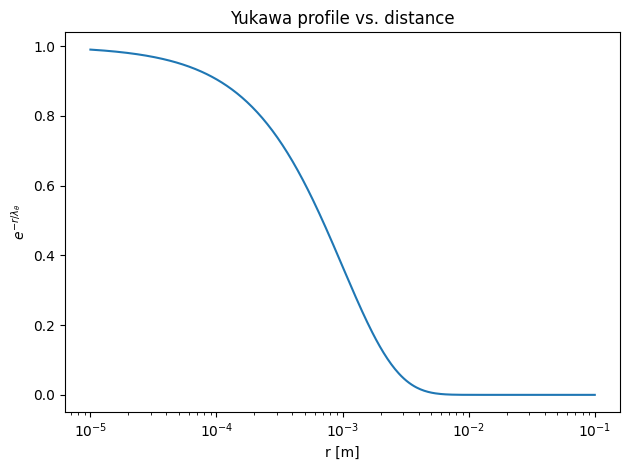

[saved FIG] C:\workspace\Physics\X-theta-framework\paper\figs\exp5_fractional_deviation.png


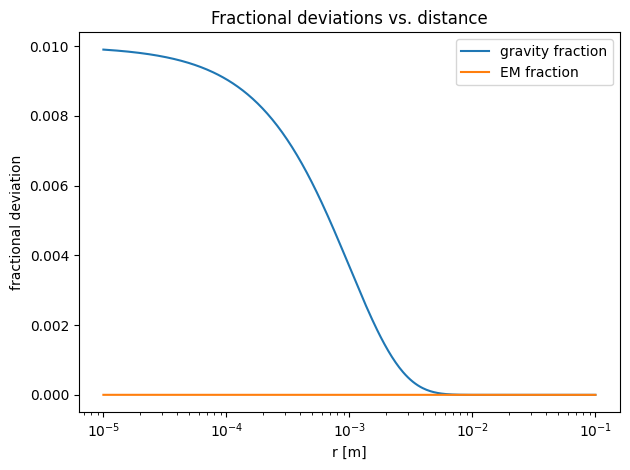

[saved CSV] C:\workspace\Physics\X-theta-framework\paper\data\exp5_yukawa_profiles.csv  rows=400


,r_m,yukawa,frac_gravity,frac_EM
0,0.000010,0.990050,0.009900,9.900498e-07
1,0.000010,0.989819,0.009898,9.898187e-07
2,0.000010,0.989582,0.009896,9.895822e-07
3,0.000011,0.989340,0.009893,9.893402e-07
4,0.000011,0.989093,0.009891,9.890926e-07


In [62]:
# --- knobs ---
lam   = 1.0e-3         # meters (1 mm range)
alphaG = 1.0e-2        # dimensionless strength in gravity channel
eps2   = 1.0e-6        # epsilon^2 for QED mixing
Q1Q2   = 1.0           # unit charges for EM demo
r = np.geomspace(1e-5, 1e-1, 400)

# Profiles
yuk = np.exp(-r/lam)
frac_G   = alphaG * yuk            # fractional deviation in gravity
frac_EM  = eps2 * yuk              # fractional deviation in EM (on top of Coulomb)

# Plots (two separate figures)
plt.figure()
plt.plot(r, yuk)
plt.xscale("log"); plt.yscale("linear")
plt.xlabel("r [m]")
plt.ylabel("$e^{-r/\\lambda_\\theta}$")
plt.title("Yukawa profile vs. distance")
fig_path4 = FIG_DIR / "exp5_yukawa_profile.png"
save_figure(fig_path4)
plt.show()

plt.figure()
plt.plot(r, frac_G, label="gravity fraction")
plt.plot(r, frac_EM, label="EM fraction")
plt.xscale("log")
plt.xlabel("r [m]")
plt.ylabel("fractional deviation")
plt.title("Fractional deviations vs. distance")
plt.legend()
fig_path5 = FIG_DIR / "exp5_fractional_deviation.png"
save_figure(fig_path5)
plt.show()

# CSV
df5 = pd.DataFrame({"r_m": r, "yukawa": yuk, "frac_gravity": frac_G, "frac_EM": frac_EM})
save_csv(df5, str(DATA_DIR / "exp5_yukawa_profiles.csv"))
df5.head()
